# Predicting Employee Attrition in a Corporate Environment

## Overview
Employee attrition is a critical challenge for many organizations, leading to high costs and loss of talent. This project aims to build a predictive model to identify employees likely to leave the company. By analyzing factors such as overtime, job satisfaction, and monthly income, we can provide actionable insights to HR teams for proactive retention strategies. Machine learning models such as Logistic Regression, Random Forest, XGBoost, and CatBoost are applied to achieve this goal.

## Problem Statement
High employee attrition negatively impacts organizational productivity and profitability. Understanding the factors driving attrition can help organizations take proactive measures to retain valuable employees. The objective of this project is to use historical employee data to predict attrition and identify key factors influencing it.

## Objectives
1. Analyze the dataset to identify patterns and relationships related to employee attrition.
2. Build and evaluate machine learning models to predict attrition.
3. Provide actionable insights for HR teams to improve retention strategies.

## Approach
The project follows these steps:
1. **Dataset Overview**: Understand the structure and characteristics of the data.
2. **Exploratory Data Analysis (EDA)**: Visualize and analyze patterns and relationships.
3. **Data Preprocessing**: Handle missing values, encode categorical variables, and balance the dataset.
4. **Modeling**: Train and evaluate machine learning models to predict attrition.
5. **Results and Insights**: Compare model performance and extract actionable insights.

## Tools and Libraries
- **Python**: For data analysis and modeling.
- **Pandas**: Data manipulation.
- **Seaborn** and **Matplotlib**: Data visualization.
- **Scikit-learn**: Machine learning models and preprocessing.
- **XGBoost** and **CatBoost**: Advanced machine learning models.



In [115]:
pip install catboost

##Importing Libraries

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier, Pool
from collections import Counter
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import RandomizedSearchCV

## Dataset Overview
The dataset used for this project is IBM HR Employee Attrition, which contains information about employee demographics, job roles, and performance metrics. The goal is to predict employee attrition (`Attrition`), a binary variable indicating whether an employee left the company (`Yes`) or stayed (`No`).

### Key Details:
- **Number of Rows**: 1,470
- **Number of Columns**: 35
- **Target Variable**: `Attrition`
- **Features**: Employee demographics, job satisfaction, monthly income, and more.


In [117]:
data = pd.read_csv("HR-Employee-Attrition.csv")
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


## Exploratory Data Analysis (EDA)
EDA is a crucial step in understanding the dataset and uncovering patterns, relationships, and anomalies in the data. In this project, we performed the following analyses:

1. **Summary Statistics**:
   - Generated descriptive statistics for numeric and categorical features to identify missing values, unique counts, and overall data quality.
   - None of the features had any missing values and some features, such as `EmployeeCount`, `StandardHours` and `Over18` had only one unique value and were dropped as they don't contribute to the model.
   - `EmployeeNumber` was also dropped as it does not provide any useful information regarding attrition.
   
2. **Visualizations**:
   - Analyzed the distribution of categorical features in relation to the target variable, `Attrition`.
   - Investigated correlations among numeric features to identify multicollinearity.
   - Strong correlations with a value of 0.95 were observed between `JobLevel` and `MonthlyIncome`. To avoid multicollinearity, we removed `JobLevel`.

3. **Insights on Class Imbalance**:
   - Observed and visualized the imbalance in the `Attrition` column, which is later addressed during preprocessing.
   - The `Attrition` column is highly imbalanced, with ~84% of the data belonging to the `No` class and only ~16% to the `Yes` class.

These analyses provided insights that guided feature engineering and model building. These findings were instrumental in cleaning the dataset, removing redundant features, and preparing the data for machine learning models.


In [118]:
# Function to summarize numeric columns
def numeric_summary(df):
  obs = df.shape[0]
  dups = df.duplicated().sum()

  df_numeric = df.select_dtypes(include='number')
  summary_df = pd.DataFrame({
      'Dtype': df_numeric.dtypes,
      'Counts': df_numeric.count(),
      'Nulls': df_numeric.isnull().sum(),
      'Mean': df_numeric.mean(),
      'Median': df_numeric.median(),
      'Min': df_numeric.min(),
      'Max': df_numeric.max(),
      'Uniques': df_numeric.apply(lambda x: x.unique().shape[0]),
      'Unique list': df_numeric.apply(lambda x: list(x.unique()) if x.nunique() < 10 else '-')
  })

  print(obs), print(dups)

  return summary_df

numeric_summary(data)

1470
0


,Dtype,Counts,Nulls,Mean,Median,Min,Max,Uniques,Unique list
Age,int64,1470,0,36.923810,36.0,18,60,43,-
DailyRate,int64,1470,0,802.485714,802.0,102,1499,886,-
DistanceFromHome,int64,1470,0,9.192517,7.0,1,29,29,-
Education,int64,1470,0,2.912925,3.0,1,5,5,"[2, 1, 4, 3, 5]"
EmployeeCount,int64,1470,0,1.000000,1.0,1,1,1,[1]
EmployeeNumber,int64,1470,0,1024.865306,1020.5,1,2068,1470,-
EnvironmentSatisfaction,int64,1470,0,2.721769,3.0,1,4,4,"[2, 3, 4, 1]"
HourlyRate,int64,1470,0,65.891156,66.0,30,100,71,-
JobInvolvement,int64,1470,0,2.729932,3.0,1,4,4,"[3, 2, 4, 1]"
JobLevel,int64,1470,0,2.063946,2.0,1,5,5,"[2, 1, 3, 4, 5]"


In [119]:
# Function to summarize object (categorical) columns
def object_summary(df):
  obs = df.shape[0]
  dups = df.duplicated().sum()

  df_object = df.select_dtypes(include='object')
  summary_df = pd.DataFrame({
      'Dtype': df_object.dtypes,
      'Counts': df_object.count(),
      'Nulls': df_object.isnull().sum(),
      'Mode': df_object.apply(lambda x: x.mode()[0] if not x.mode().empty else '-'),
      'Frequency': df_object.apply(lambda x: x.value_counts().max() if not x.value_counts().empty else '-'),
      'Uniques': df_object.apply(lambda x: x.unique().shape[0]),
      'Unique list': df_object.apply(lambda x: list(x.unique()) if x.nunique() < 10 else '-')
  })

  print(obs), print(dups)

  return summary_df

object_summary(data)

1470
0


,Dtype,Counts,Nulls,Mode,Frequency,Uniques,Unique list
Attrition,object,1470,0,No,1233,2,"[Yes, No]"
BusinessTravel,object,1470,0,Travel_Rarely,1043,3,"[Travel_Rarely, Travel_Frequently, Non-Travel]"
Department,object,1470,0,Research & Development,961,3,"[Sales, Research & Development, Human Resources]"
EducationField,object,1470,0,Life Sciences,606,6,"[Life Sciences, Other, Medical, Marketing, Tec..."
Gender,object,1470,0,Male,882,2,"[Female, Male]"
JobRole,object,1470,0,Sales Executive,326,9,"[Sales Executive, Research Scientist, Laborato..."
MaritalStatus,object,1470,0,Married,673,3,"[Single, Married, Divorced]"
Over18,object,1470,0,Y,1470,1,[Y]
OverTime,object,1470,0,No,1054,2,"[Yes, No]"


In [120]:
# Drop columns that do not provide discriminatory information (redundant features)
data.drop(['EmployeeCount','EmployeeNumber','StandardHours','Over18'], axis=1, inplace=True)

# Make a copy of the data for further processing
df = data.copy()

<ipython-input-121-91ca2fcf9ed9>:13: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.barplot(data=grouped_data, x=col, y='Count', hue='Attrition', palette=palette)


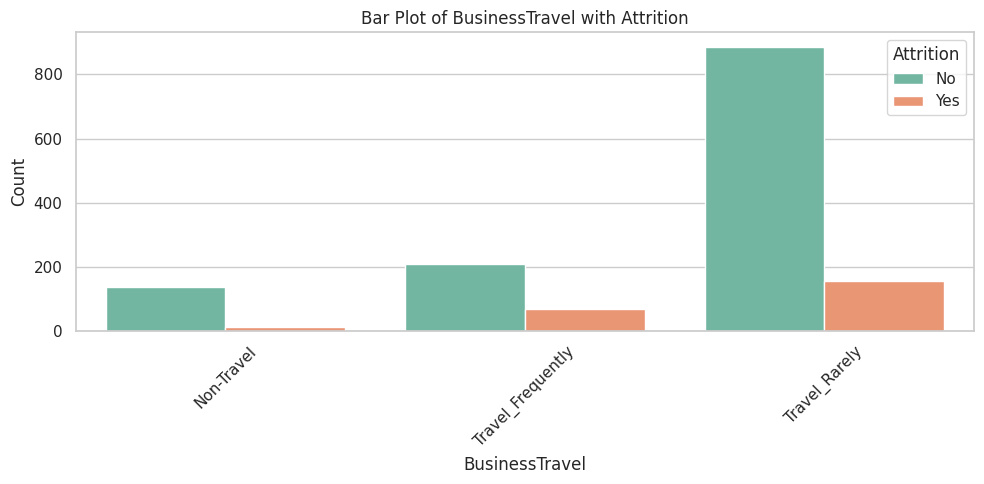

<ipython-input-121-91ca2fcf9ed9>:13: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.barplot(data=grouped_data, x=col, y='Count', hue='Attrition', palette=palette)


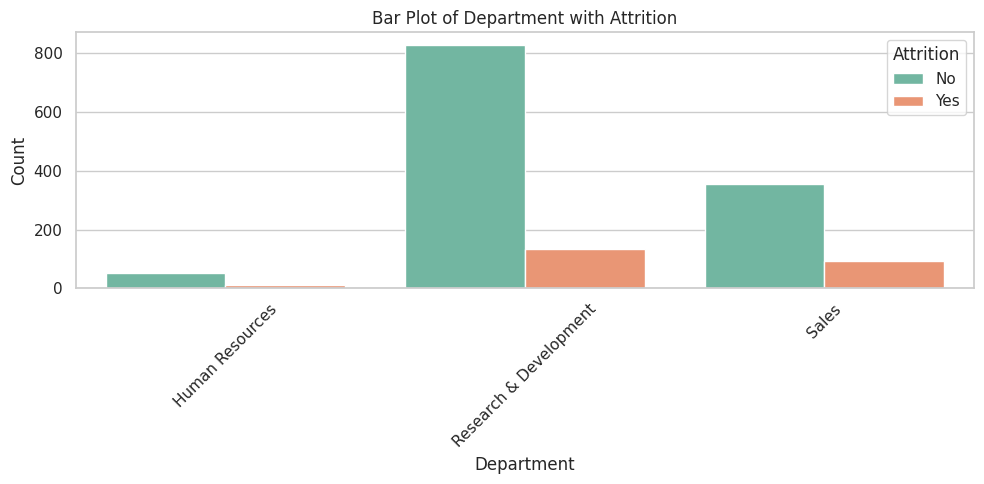

<ipython-input-121-91ca2fcf9ed9>:13: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.barplot(data=grouped_data, x=col, y='Count', hue='Attrition', palette=palette)


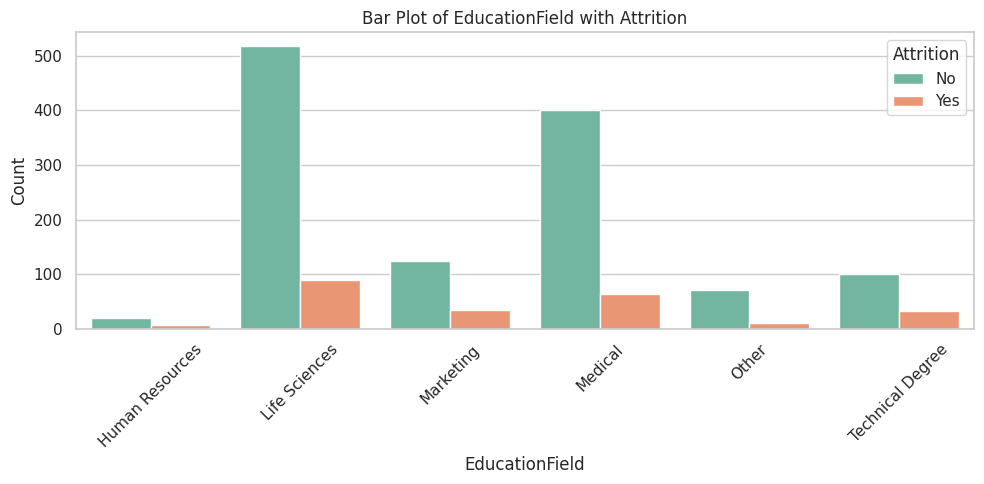

<ipython-input-121-91ca2fcf9ed9>:13: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.barplot(data=grouped_data, x=col, y='Count', hue='Attrition', palette=palette)


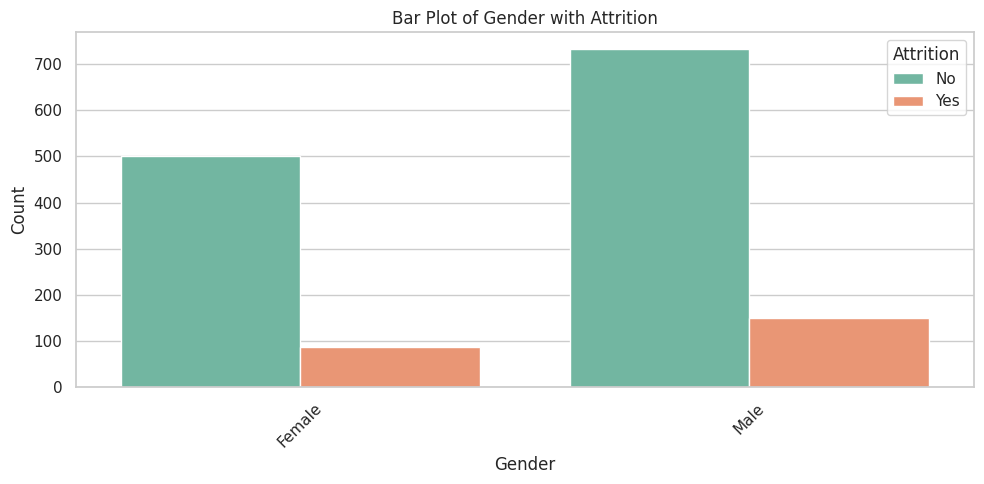

<ipython-input-121-91ca2fcf9ed9>:13: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.barplot(data=grouped_data, x=col, y='Count', hue='Attrition', palette=palette)


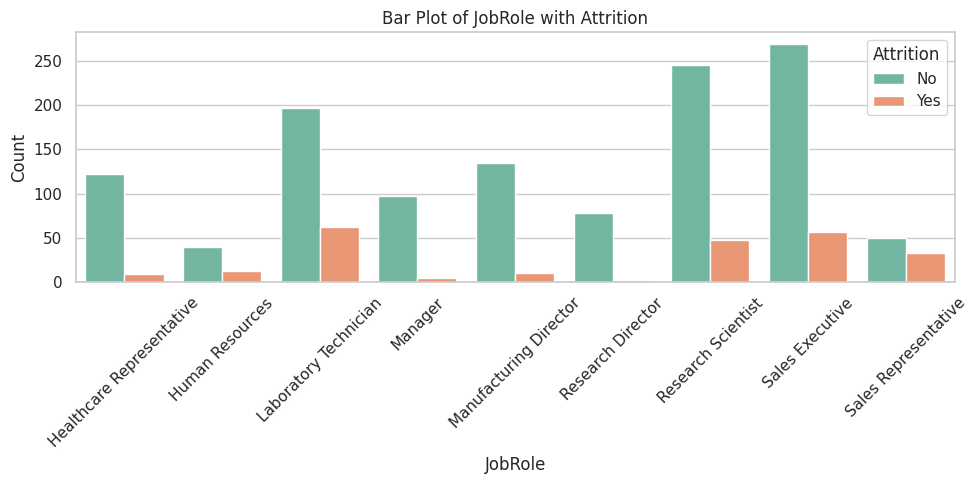

<ipython-input-121-91ca2fcf9ed9>:13: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.barplot(data=grouped_data, x=col, y='Count', hue='Attrition', palette=palette)


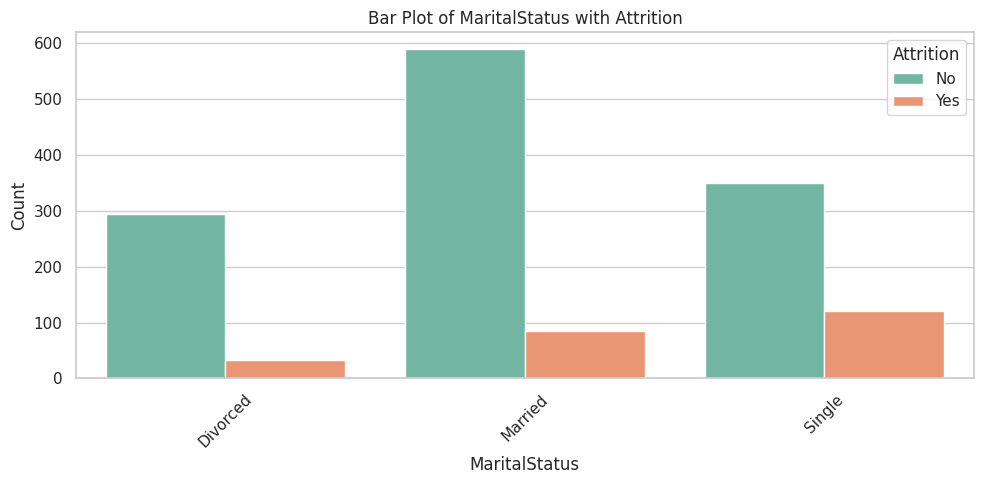

<ipython-input-121-91ca2fcf9ed9>:13: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.barplot(data=grouped_data, x=col, y='Count', hue='Attrition', palette=palette)


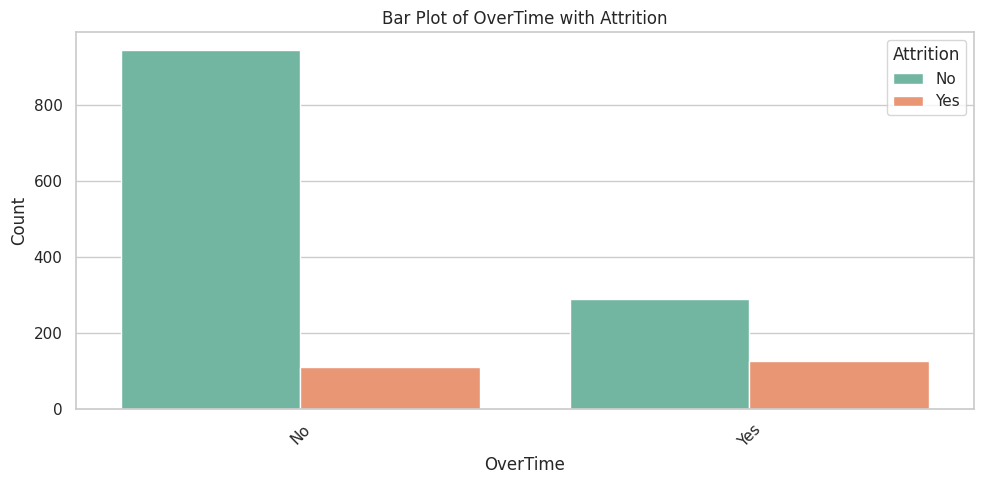

In [121]:
# Extract categorical columns excluding the target variable
cat_data = data.select_dtypes(include='object')
cat_data.drop('Attrition', axis=1, inplace=True)
palette = sns.color_palette('Set2', n_colors=9)

# Loop through each categorical column
for col in cat_data.columns:
    plt.figure(figsize=(10, 5))

    # Group by the column and Attrition, count the occurrences
    grouped_data = data.groupby([col, 'Attrition']).size().reset_index(name='Count')

    sns.barplot(data=grouped_data, x=col, y='Count', hue='Attrition', palette=palette)

    plt.title(f'Bar Plot of {col} with Attrition')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


<Axes: >

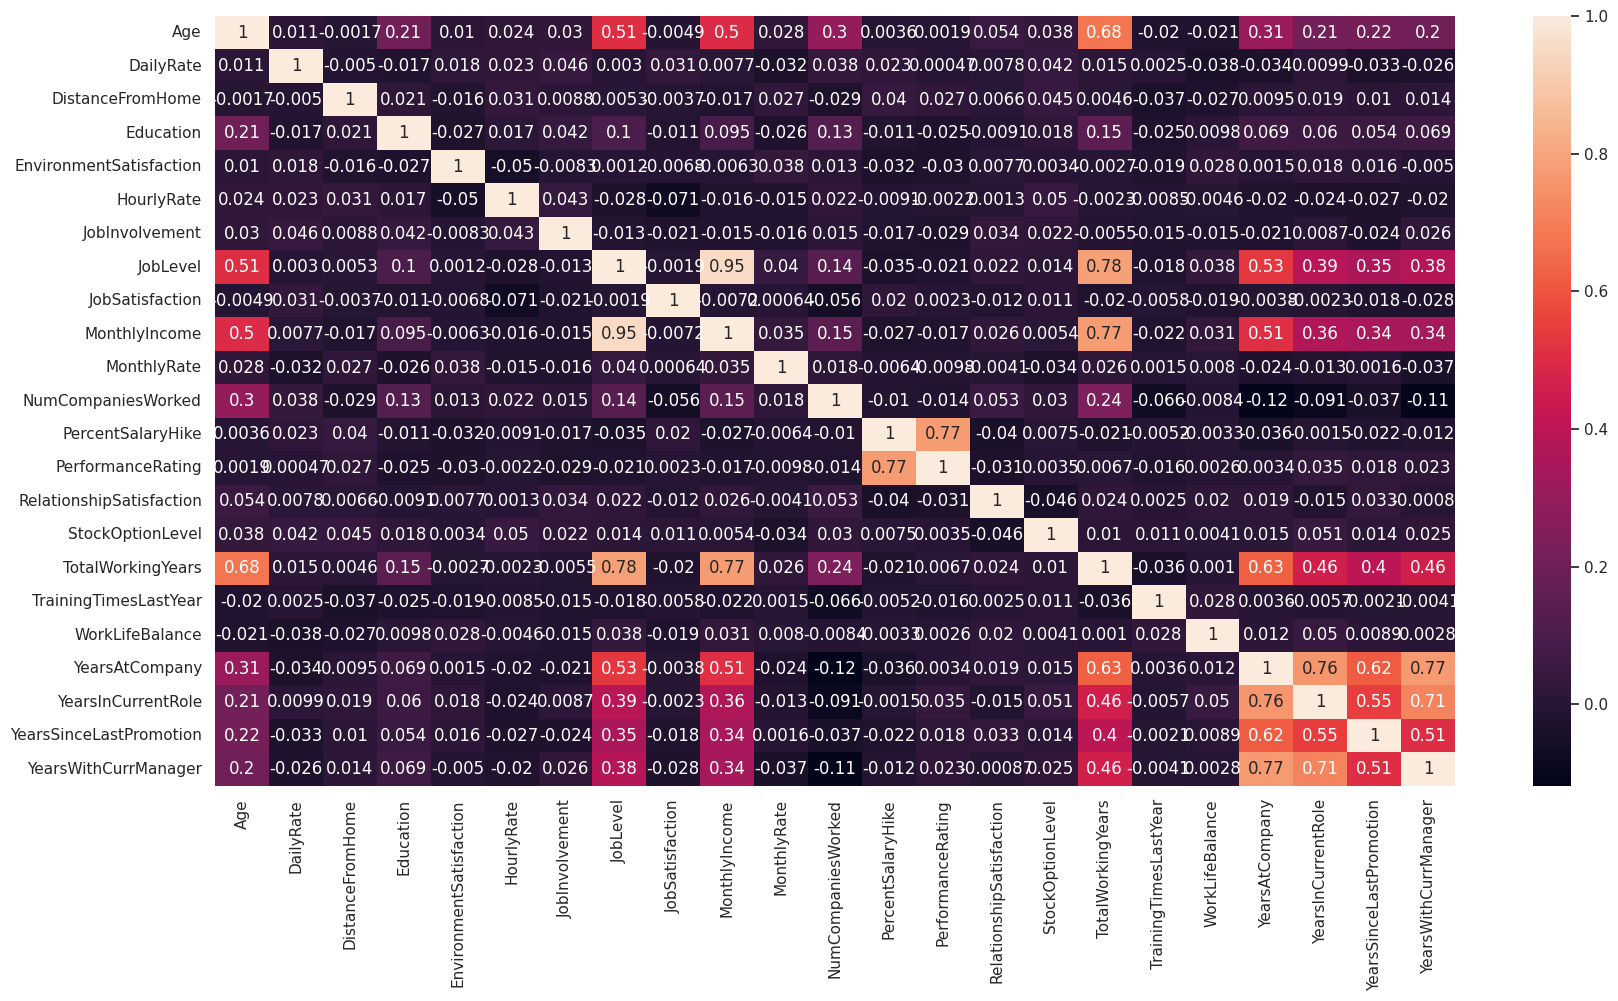

In [122]:
# Extract numeric columns for correlation analysis and compute the correlation matrix
num_data = data.select_dtypes(include='number')
corr = num_data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True)

<ipython-input-123-17e08b84c090>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='JobLevel', y='MonthlyIncome', data=data, palette='Set3')


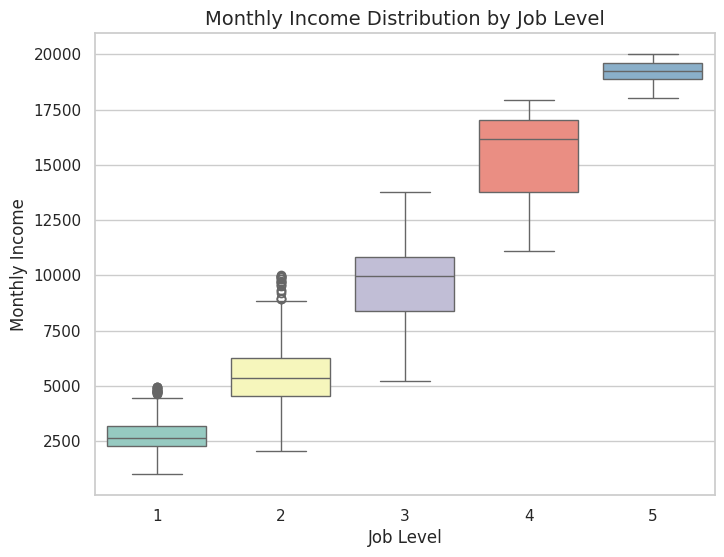

In [123]:
# Visualize the relationship between JobLevel and MonthlyIncome using a boxplot
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))

sns.boxplot(x='JobLevel', y='MonthlyIncome', data=data, palette='Set3')

plt.title('Monthly Income Distribution by Job Level', fontsize=14)
plt.xlabel('Job Level', fontsize=12)
plt.ylabel('Monthly Income', fontsize=12)

plt.show()

In [124]:
# Drop the 'JobLevel' column due to high correlation with MonthlyIncome
data.drop(['JobLevel'], axis=1, inplace=True)

In [125]:
# Display class imbalance in the Attrition column
data['Attrition'].value_counts()

,count
Attrition,
No,1233
Yes,237


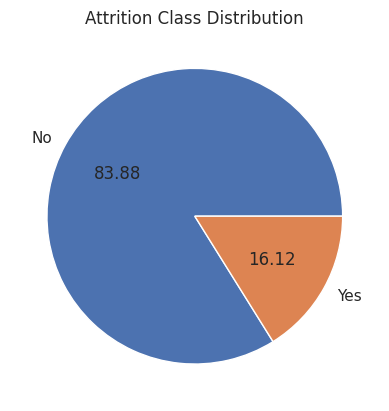

In [126]:
# Visualize the class distribution using a pie chart
data['Attrition'].value_counts().plot.pie(autopct='%.2f', labels=['No', 'Yes'])
plt.title('Attrition Class Distribution')
plt.ylabel('')
plt.show()

## Data Preprocessing
To prepare the dataset for machine learning models, we performed the following preprocessing steps:

1. **Encoding Categorical Variables**:
   - **Label Encoding**: Used for binary categorical variables (`Attrition`, `Gender`, and `OverTime`) to convert them into numerical values.
    - `Attrition`: Converted to `0` (No) and `1` (Yes).
    - `Gender`: Converted to `0` (Female) and `1` (Male).
    - `OverTime`: Converted to `0` (No) and `1` (Yes).
   - **One Hot Encoding**: Applied to multi-class categorical variables (`BusinessTravel`, `Department`, etc.) to create binary indicator columns while avoiding multicollinearity using `drop='first'`.

2. **Handling Class Imbalance**:
   - The target variable `Attrition` was imbalanced (with ~84% `No` and ~16% `Yes`).
   - To address this, we used **SMOTE (Synthetic Minority Over-sampling Technique)** to oversample the minority class (`Yes`) in the training set.
   - After applying SMOTE, the training set was balanced, with an equal number of samples for both classes (`Yes` and `No`).
   - This helps prevent the model from being biased toward the majority class during training.

These preprocessing steps ensured the dataset was properly formatted, balanced, and ready for model training.


In [127]:
# Initialize LabelEncoder

le = LabelEncoder()
data['Attrition'] = le.fit_transform(data['Attrition'])
data['Gender'] = le.fit_transform(data['Gender'])
data['OverTime'] = le.fit_transform(data['OverTime'])

###One Hot Encoding

In [128]:
# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first', dtype=int)

# List of categorical features to encode
features = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']

# Apply OneHotEncoding for each feature
for i in features:
  encoded_array = encoder.fit_transform(data[[i]])
  encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out([i]))
  data = pd.concat([data, encoded_df], axis=1)
  data.drop(i, axis=1, inplace=True)

In [129]:
data

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobSatisfaction,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,0,94,3,4,...,0,0,0,0,0,0,1,0,0,1
1,49,0,279,8,1,3,1,61,2,2,...,0,0,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,4,1,92,2,3,...,0,1,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,4,0,56,3,3,...,0,0,0,0,0,1,0,0,1,0
4,27,0,591,2,1,1,1,40,3,2,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,3,1,41,4,4,...,0,1,0,0,0,0,0,0,1,0
1466,39,0,613,6,1,4,1,42,2,1,...,0,0,0,0,0,0,0,0,1,0
1467,27,0,155,4,3,2,1,87,4,2,...,0,0,0,1,0,0,0,0,1,0
1468,49,0,1023,2,3,4,1,63,2,2,...,0,0,0,0,0,0,1,0,1,0


In [130]:
# Separate features and target variable
X = data.drop('Attrition', axis=1)     # Features
y = data['Attrition']                  # Target variable

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

# Check the distribution after splitting
print(f"Before applying SMOTE:")
print(f"Training set class distribution: {Counter(y_train)}")
print(f"Testing set class distribution: {Counter(y_test)}")

# Save the original y_test for future evaluation
temp = y_test

# Apply SMOTE to balance the classes in the training data
smote = SMOTE(random_state=29)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"\nAfter applying SMOTE:")
print(f"Training set class distribution: {Counter(y_train_smote)}")

Before applying SMOTE:
Training set class distribution: Counter({0: 990, 1: 186})
Testing set class distribution: Counter({0: 243, 1: 51})

After applying SMOTE:
Training set class distribution: Counter({0: 990, 1: 990})


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


## Machine Learning Models

This section focuses on building and evaluating machine learning models to predict employee attrition. Four models were tested and compared:

1. **Logistic Regression (Lasso)**:
   - A linear model with L1 regularization, which helps in feature selection by shrinking less important feature coefficients to zero.

2. **Random Forest**:
   - An ensemble method that combines multiple decision trees to improve accuracy and reduce overfitting. Hyperparameter tuning was performed using `RandomizedSearchCV` to optimize the model.

3. **XGBoost**:
   - A gradient boosting algorithm known for its efficiency and performance on structured/tabular data. Feature importance was extracted to interpret the model.

4. **CatBoost**:
   - A gradient boosting model specifically optimized for categorical features, with class weights to handle imbalanced data.

Each model's performance was evaluated using key metrics such as:
- **Classification Report**: Precision, recall, F1-score for each class.
- **Confusion Matrix**: Visualizes true positives, false positives, true negatives, and false negatives.
- **AUC Score**: Measures the ability of the model to distinguish between classes.
- **Feature Importance**: Highlights the most influential features for the model.

Finally, a **Combined ROC Curve** was plotted to compare the models' performance visually.


## Outputs and Insights

### 1. Logistic Regression
- **Metrics**:
  - Weighted F1-score: **0.88**
  - AUC Score: **0.81**
- **Confusion Matrix**:
  - Correctly identified **29/51** attrition cases (57% recall).
- **Summary**:
  - Good performance for non-attrition cases but struggled with minority class.

### 2. Random Forest Classifier
- **Best Parameters**:
  - `n_estimators`: 200, `max_depth`: 20
- **Metrics**:
  - Weighted F1-score: **0.82**
  - AUC Score: **0.76**
- **Confusion Matrix**:
  - Identified **15/51** attrition cases (29% recall).
- **Summary**:
  - Over-prioritized non-attrition cases; limited minority class recall.

### 3. XGBoost
- **Metrics**:
  - Weighted F1-score: **0.86**
  - AUC Score: **0.76**
- **Confusion Matrix**:
  - Identified **20/51** attrition cases (39% recall).
- **Feature Importance**:
  - Visualized feature importances revealed that features like `StockOptionLevel` and `JobRole` were critical predictors.
- **Summary**:
  - Slight improvement over Random Forest; feature importance highlights key predictors.

### 4. CatBoost
- **Metrics**:
  - Weighted F1-score: **0.83**
  - AUC Score: **0.82**
- **Confusion Matrix**:
  - Identified **24/47** attrition cases (51% recall).
- **Feature Importance**:
  - Highlighted features like `OverTime` and `Age` as key drivers of attrition.
- **Summary**:
  - Best performance among models; balanced recall and AUC.

### 5. Combined ROC Curve
- **AUC Scores**:
  - CatBoost: **0.82** > Logistic Regression: **0.81** > XGBoost: **0.79** > Random Forest: **0.76**
- **Summary**:
  - CatBoost emerged as the best model, effectively handling class imbalance.



In [131]:
# Initialize Logistic Regression with L1 regularization (Lasso)
lasso_logreg = LogisticRegression(
    penalty='l1',          # Using L1 regularization (Lasso)
    solver='liblinear',    # Supports L1 regularization
    C=1,                   # Regularization strength (inverse of lambda)
    max_iter=1000,         # Maximum number of iterations for convergence
    random_state=42        # Ensures reproducibility
)

# Fit the model on the oversampled training data
lasso_logreg.fit(X_train_smote, y_train_smote)

# Make predictions and calculate probabilities for the test data
y_pred_logreg = lasso_logreg.predict(X_test)
y_pred_proba_logreg = lasso_logreg.predict_proba(X_test)[:, 1]

print("\nClassification Report")
print(classification_report(y_test, y_pred_logreg))


Classification Report
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       243
           1       0.72      0.57      0.64        51

    accuracy                           0.89       294
   macro avg       0.82      0.76      0.79       294
weighted avg       0.88      0.89      0.88       294



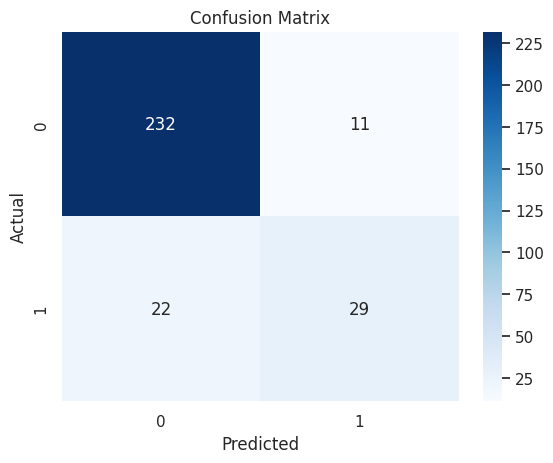

In [132]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [133]:
# Calculate and display AUC score
auc_score = roc_auc_score(y_test, y_pred_proba_logreg)
print("AUC Score:", auc_score)

AUC Score: 0.8070685064149117


In [134]:
# Define hyperparameter search space for Random Forest
param_dist = {
    'n_estimators': [50, 100, 200],   # Number of trees
    'max_depth': [None, 10, 20, 30],  # Depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]     # Minimum samples in a leaf node
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=29)

# Perform randomized search for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,  # Test 20 random combinations
    cv=5,       # 5-fold cross-validation
    scoring='roc_auc',
    verbose=1,
    n_jobs=-1,
    random_state=29
)

# Fit RandomizedSearchCV on the oversampled training data
random_search.fit(X_train_smote, y_train_smote)

print("Best Parameters for Random Forest:", random_search.best_params_)

# Use the best model from RandomizedSearchCV
rf = random_search.best_estimator_

# Make predictions and calculate probabilities for the test data
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]

print("\nClassification Report")
print(classification_report(y_test, y_pred_rf))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       243
           1       0.58      0.29      0.39        51

    accuracy                           0.84       294
   macro avg       0.72      0.62      0.65       294
weighted avg       0.82      0.84      0.82       294



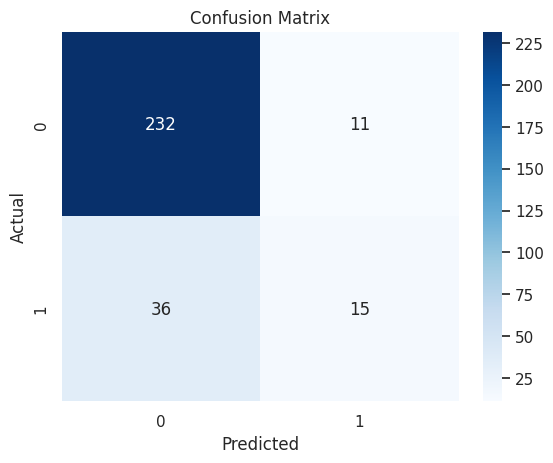

In [135]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [136]:
# Calculate and display AUC score
auc_score = roc_auc_score(y_test, y_pred_proba_rf)
print("AUC Score:", auc_score)

AUC Score: 0.7569999193092875


In [137]:
# Initialize XGBoost classifier
xgb = XGBClassifier(
    objective='binary:logistic',  # Binary classification
    eval_metric='logloss',        # Evaluation metric for binary classification
    use_label_encoder=False,      # Disable label encoding for categories
    random_state=29
)

# Fit XGBoost on the oversampled training data
xgb.fit(X_train_smote, y_train_smote)

# Make predictions and calculate probabilities for the test data
y_pred_xgb = xgb.predict(X_test)
y_pred_proba_xgb = xgb.predict_proba(X_test)[:,1]

print("\nClassification Report")
print(classification_report(y_test, y_pred_xgb))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:57:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Classification Report
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       243
           1       0.77      0.39      0.52        51

    accuracy                           0.87       294
   macro avg       0.83      0.68      0.72       294
weighted avg       0.86      0.87      0.86       294



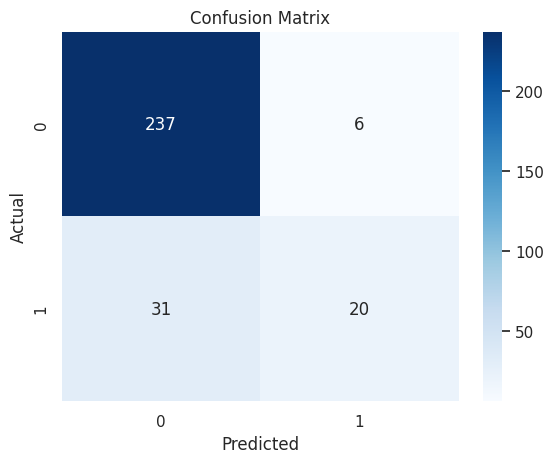

In [138]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [139]:
# Calculate and display AUC score
auc_score = roc_auc_score(y_test, y_pred_proba_rf)
print("AUC Score:", auc_score)

AUC Score: 0.7569999193092875


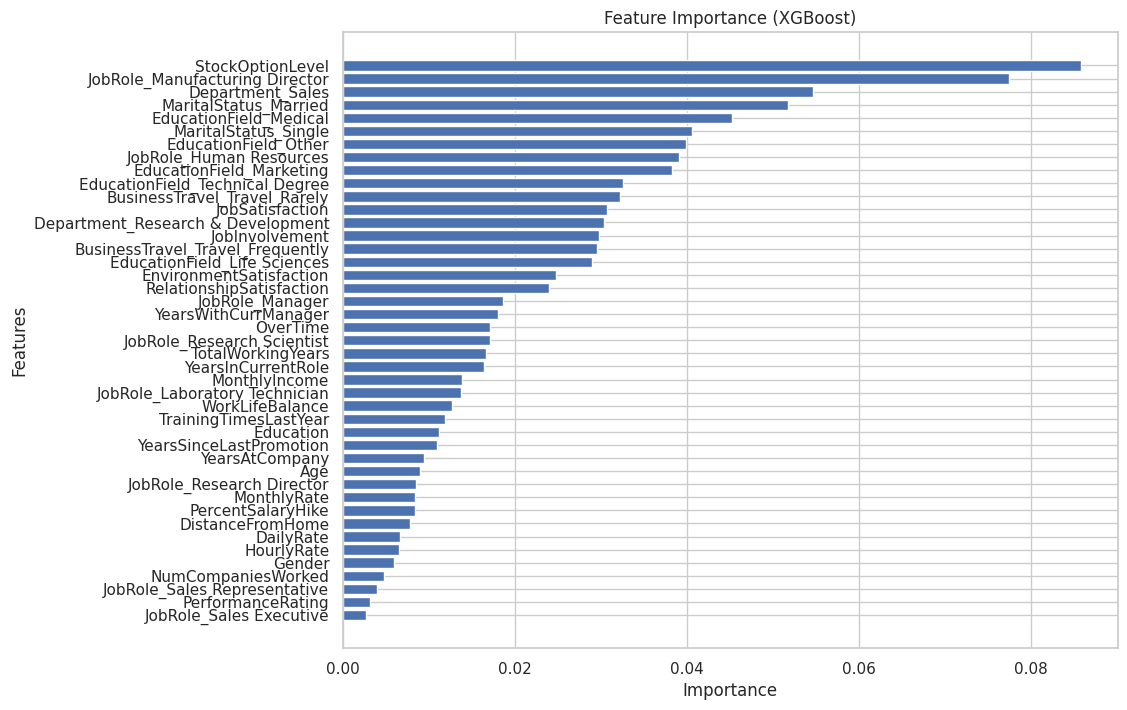

In [140]:
#Feature Importance from XGBoost
importances = xgb.feature_importances_
feature_names = X_train_smote.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.title('Feature Importance (XGBoost)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.show()


In [141]:
data = df

X = data.drop('Attrition', axis=1)
y = data['Attrition']

# Map categorical features to column indices
categorical_features = [X.columns.get_loc(col) for col in X.select_dtypes(include='object').columns]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=29, stratify=y
)

classes = np.array(['Yes', 'No'])

# Compute class weights for imbalance
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=classes,
    y=y_train
)

class_weights_dict = dict(zip(classes, class_weights))

y_train_numeric = y_train.map({'Yes': 1, 'No': 0})

# Initialize CatBoost
catboost = CatBoostClassifier(
    iterations=100,          # Number of iterations
    learning_rate=0.1,       # Learning rate
    depth=6,                 # Depth of trees
    eval_metric='AUC',       # Evaluation metric
    class_weights=[class_weights_dict['No'], class_weights_dict['Yes']],  # Ensure order matches numeric mapping
    cat_features=categorical_features,
    random_seed=42,
    verbose=50
)

# Fit CatBoost on the training data
catboost.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=20)

# Make predictions and calculate probabilities for the test data
y_pred_catboost = catboost.predict(X_test)
y_pred_proba_catboost = catboost.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

print("\nClassification Report:")
print(classification_report(y_test, y_pred_catboost))



0:	test: 0.6079335	best: 0.6079335 (0)	total: 5.7ms	remaining: 565ms
50:	test: 0.8141959	best: 0.8160910 (48)	total: 237ms	remaining: 228ms
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.8160909639
bestIteration = 48

Shrink model to first 49 iterations.

Classification Report:
              precision    recall  f1-score   support

          No       0.91      0.89      0.90       247
         Yes       0.47      0.51      0.49        47

    accuracy                           0.83       294
   macro avg       0.69      0.70      0.69       294
weighted avg       0.84      0.83      0.83       294



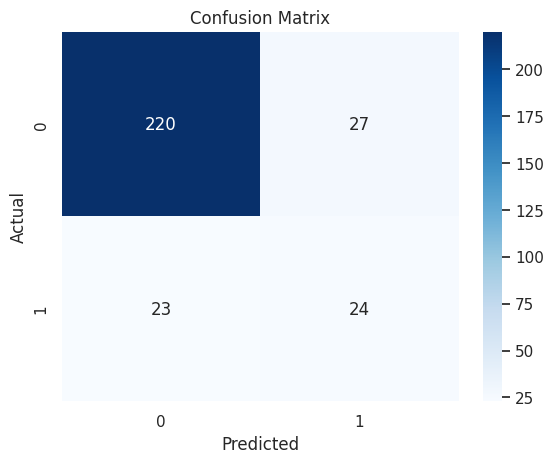

In [142]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_catboost)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [143]:
# Calculate and display AUC score
y_test_numeric = y_test.map({'Yes': 1, 'No': 0})

auc_score = roc_auc_score(y_test_numeric, y_pred_proba_catboost)
print("AUC Score:", auc_score)

AUC Score: 0.8160909639073134


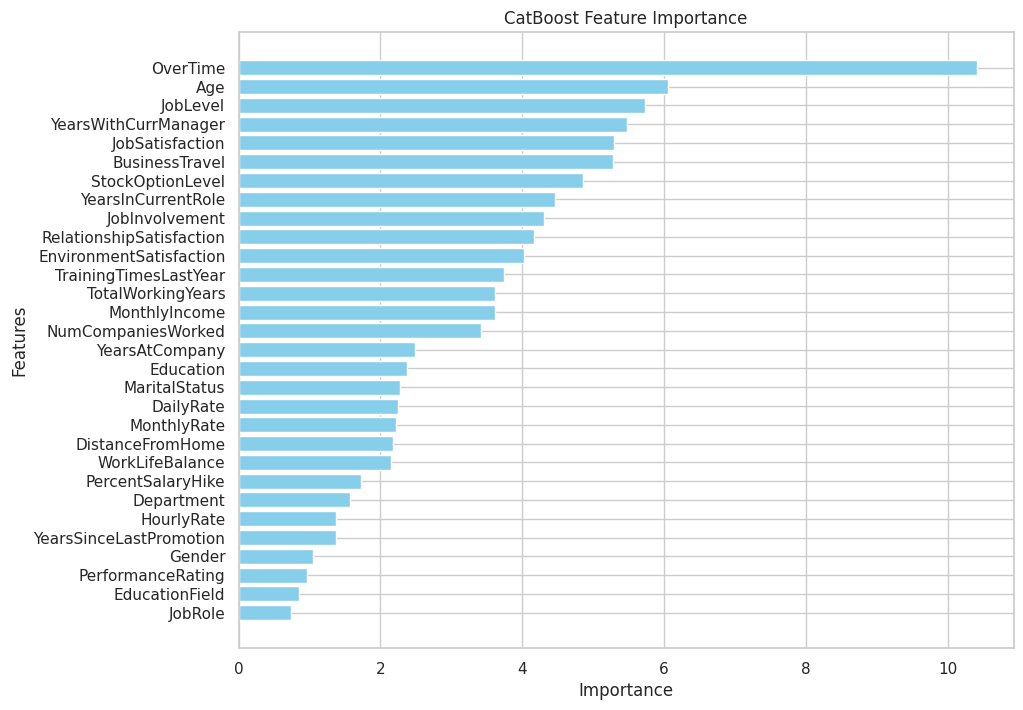

In [144]:
#Feature Importance from CatBoost
feature_names = X.columns

feature_importance = catboost.get_feature_importance(type='FeatureImportance')
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('CatBoost Feature Importance')
plt.gca().invert_yaxis()
plt.show()


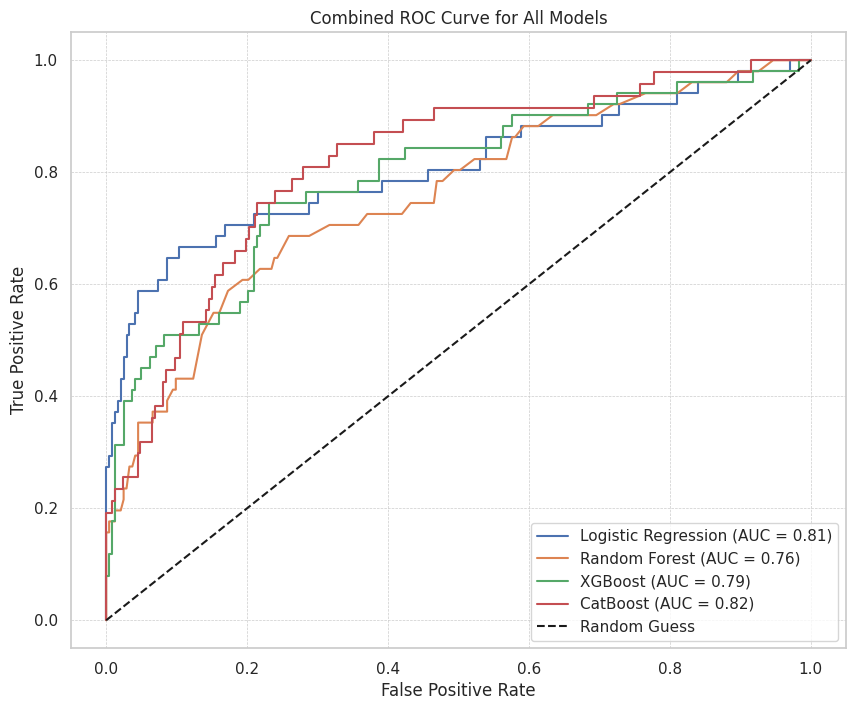

In [145]:
# Store model predictions
models = {
    "Logistic Regression": y_pred_proba_logreg,
    "Random Forest": y_pred_proba_rf,
    "XGBoost": y_pred_proba_xgb,
    "CatBoost": y_pred_proba_catboost
}

plt.figure(figsize=(10, 8))

# Plot combined ROC curve
for model_name, y_pred_proba in models.items():
  if model_name == "CatBoost":
    fpr, tpr, _ = roc_curve(y_test_numeric, y_pred_proba)
    auc_score = roc_auc_score(y_test_numeric, y_pred_proba)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc_score:.2f})")

  else:
    fpr, tpr, _ = roc_curve(temp, y_pred_proba)
    auc_score = roc_auc_score(temp, y_pred_proba)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("Combined ROC Curve for All Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()